In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
from helpers import *
from helpers import *
from plots import *
from plots import *
from split_data import *
from recommender import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

## Load Data

In [2]:
path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


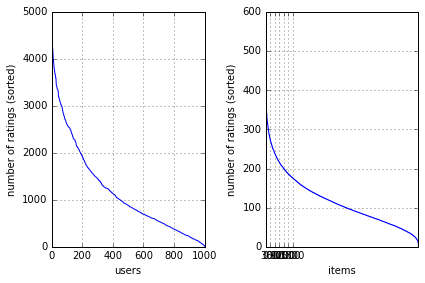

min # of items per user = 8, min # of users per item = 3.


In [3]:
num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

## Split data into training and test set

In [4]:
valid_ratings, train_validation, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
#plot_train_test_data(train_validation, test)

## Matrix factorisation using SGD

In [ ]:
%run run.py 0

## ALS

In [ ]:
%run run.py 1

## Other Methods
### CCD

In [10]:
%run run.py 2

Loading training data
number of items: 10000, number of users: 1000
Preprocessing data
Splitting data into train and test sets
Training model
learn the matrix factorization using CCD...
iter: 0.0, RMSE on training set: 2.9950929124619052.
iter: 1.0, RMSE on training set: 2.8375133312177385.
iter: 2.0, RMSE on training set: 2.698924358850894.
iter: 3.0, RMSE on training set: 2.5769580418708635.
iter: 4.0, RMSE on training set: 2.4695058435338724.
iter: 5.0, RMSE on training set: 2.3747001823458365.
iter: 6.0, RMSE on training set: 2.2908928062854743.
iter: 7.0, RMSE on training set: 2.2166350497167655.
iter: 8.0, RMSE on training set: 2.1506589227177604.
iter: 9.0, RMSE on training set: 2.0918589698662795.
iter: 10.0, RMSE on training set: 2.0392749650854327.
iter: 11.0, RMSE on training set: 1.9920755622374824.
iter: 12.0, RMSE on training set: 1.949543027272273.
iter: 13.0, RMSE on training set: 1.9110591555029883.
iter: 14.0, RMSE on training set: 1.8760924395755691.
iter: 15.0, RMSE

## Cross validation

### Number of features

In [7]:
## !!! Takes long time to run

method = 2     # 0-SGD 1-ALS
K = 5         ## K-fold cross validation
gamma = 0.01
num_features_arr = [1, 3, 5, 7, 10, 13, 15]   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
min_num_ratings=10

train_rmse_mean = np.zeros(len(num_features_arr))
train_rmse_std = np.zeros(len(num_features_arr))
validation_rmse_mean = np.zeros(len(num_features_arr))
validation_rmse_std = np.zeros(len(num_features_arr))

for i, num_features in enumerate(num_features_arr):
    train_rmse_arr = []
    validation_rmse_arr = []
    
    print('Running num_features={n}'.format(n=num_features))
    [train_rmse_arr, validation_rmse_arr] = cross_validation(ratings, K, method, num_items_per_user, 
                                                             num_users_per_item, min_num_ratings, num_features, lambda_user, lambda_item)
        
    ## Calculate mean and standard deviation    
    train_rmse_mean[i] = np.mean(train_rmse_arr)
    train_rmse_std[i] = np.std(train_rmse_arr)
    validation_rmse_mean[i] = np.mean(validation_rmse_arr)
    validation_rmse_std[i] = np.std(validation_rmse_std)
    
## Plotting results
plt.fill_between(num_features_arr, train_rmse_mean - train_rmse_std,
                     train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(num_features_arr, validation_rmse_mean - validation_rmse_std,
                     validation_rmse_mean + validation_rmse_std, alpha=0.1, color="g")
plt.plot(num_features_arr, train_rmse_mean, 'o-', color="r")
plt.plot(num_features_arr, validation_rmse_mean, 'o-', color="g")
plt.legend(('Train', 'Validation'))
plt.xlabel('Number of features (K)'); plt.ylabel('RMSE');
plt.show()

Running num_features=1
Running 1th fold in 5 folds
learn the matrix factorization using CCD...
iter: 0.0, RMSE on training set: 0.9964503244960371.
iter: 1.0, RMSE on training set: 0.9964503242477375.
RMSE on test data: 0.9964587238475606.
Running 2th fold in 5 folds


KeyboardInterrupt: 

In [6]:
print(train_rmse_mean)
print(train_rmse_std)
print(validation_rmse_mean)
print(validation_rmse_std)

[ 0.99645032  0.99644168  0.          0.          0.          0.          0.        ]
[  1.11022302e-16   1.11022302e-16   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
[ 0.99645154  0.99644258  0.          0.          0.          0.          0.        ]
[ 0.  0.  0.  0.  0.  0.  0.]


### lambda_user

Running lambda_user=0.01
Running 1th fold in 5 folds
learn the matrix factorization using CCD...
iter: 0.0, RMSE on training set: 1.9483779205621994.
iter: 1.0, RMSE on training set: 1.862727347449762.
iter: 2.0, RMSE on training set: 1.7872175860855795.
iter: 3.0, RMSE on training set: 1.7205475041220912.
iter: 4.0, RMSE on training set: 1.661578195998678.
iter: 5.0, RMSE on training set: 1.6092995189186037.
iter: 6.0, RMSE on training set: 1.5628209137467963.
iter: 7.0, RMSE on training set: 1.5213619368710363.
iter: 8.0, RMSE on training set: 1.4842425041715162.
iter: 9.0, RMSE on training set: 1.4508730741511724.
iter: 10.0, RMSE on training set: 1.4207450030579345.
iter: 11.0, RMSE on training set: 1.3934212788117923.
iter: 12.0, RMSE on training set: 1.3685277973314718.
iter: 13.0, RMSE on training set: 1.3457452954175693.
iter: 14.0, RMSE on training set: 1.324802006513885.
iter: 15.0, RMSE on training set: 1.3054670641842618.
iter: 16.0, RMSE on training set: 1.2875446451985857

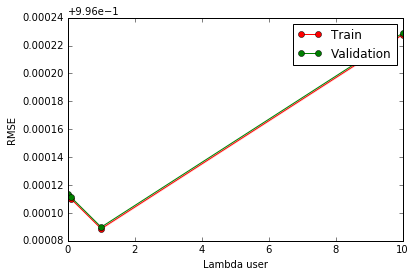

In [9]:
## !!! Takes long time to run

method = 2     # 0-SGD 1-ALS
K = 5        ## K-fold cross validation
gamma = 0.01
num_features = 4   # K in the lecture notes
lambda_user_arr = [0.01, 0.1, 1, 10]
lambda_item = 0.7
min_num_ratings=10

train_rmse_mean = np.zeros(len(lambda_user_arr))
train_rmse_std = np.zeros(len(lambda_user_arr))
validation_rmse_mean = np.zeros(len(lambda_user_arr))
validation_rmse_std = np.zeros(len(lambda_user_arr))

for i, lambda_user in enumerate(lambda_user_arr):
    train_rmse_arr = []
    validation_rmse_arr = []
    
    print('Running lambda_user={n}'.format(n=lambda_user))
    [train_rmse_arr, validation_rmse_arr] = cross_validation(ratings, K, method, num_items_per_user, 
                                                             num_users_per_item, min_num_ratings,  num_features, lambda_user, lambda_item)
        
    train_rmse_mean[i] = np.mean(train_rmse_arr)
    train_rmse_std[i] = np.std(train_rmse_arr)
    validation_rmse_mean[i] = np.mean(validation_rmse_arr)
    validation_rmse_std[i] = np.std(validation_rmse_std)
    
## Plotting results
plt.fill_between(lambda_user_arr, train_rmse_mean - train_rmse_std,
                     train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(lambda_user_arr, validation_rmse_mean - validation_rmse_std,
                     validation_rmse_mean + validation_rmse_std, alpha=0.1, color="g")
plt.plot(lambda_user_arr, train_rmse_mean, 'o-', color="r")
plt.plot(lambda_user_arr, validation_rmse_mean, 'o-', color="g")
plt.legend(('Train', 'Validation'))
plt.xlabel('Lambda user'); plt.ylabel('RMSE');
plt.show()

### Lambda item

Running lambda_item=0.01
Running 1th fold in 10 folds
learn the matrix factorization using CCD...
iter: 0.0, RMSE on training set: 2.1600884532752853.
iter: 1.0, RMSE on training set: 2.059975489789081.
iter: 2.0, RMSE on training set: 1.9719940549614947.
iter: 3.0, RMSE on training set: 1.8944981469247968.
iter: 4.0, RMSE on training set: 1.82610220237677.
iter: 5.0, RMSE on training set: 1.765589430137033.
iter: 6.0, RMSE on training set: 1.7118962522386145.
iter: 7.0, RMSE on training set: 1.6640971291473738.
iter: 8.0, RMSE on training set: 1.6213898783493914.
iter: 9.0, RMSE on training set: 1.5830816863616493.
iter: 10.0, RMSE on training set: 1.5485759889125805.
iter: 11.0, RMSE on training set: 1.5173603525115549.
iter: 12.0, RMSE on training set: 1.4889954406938957.
iter: 13.0, RMSE on training set: 1.463105098356067.
iter: 14.0, RMSE on training set: 1.4393675438339046.
iter: 15.0, RMSE on training set: 1.417507623843442.
iter: 16.0, RMSE on training set: 1.3972900618955861.


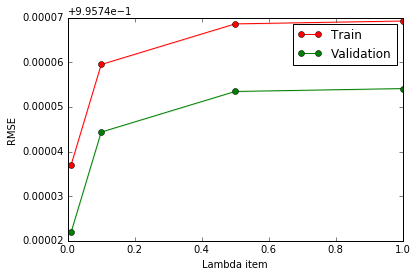

In [11]:
## !!! Takes long time to run

method = 2     # 0-SGD 1-ALS
K = 10        ## K-fold cross validation
gamma = 0.01
num_features = 5   # K in the lecture notes
lambda_user = 0.1
lambda_item_arr = [0.01, 0.1, 0.5, 1]
min_num_ratings=10

train_rmse_mean = np.zeros(len(lambda_item_arr))
train_rmse_std = np.zeros(len(lambda_item_arr))
validation_rmse_mean = np.zeros(len(lambda_item_arr))
validation_rmse_std = np.zeros(len(lambda_item_arr))

for i, lambda_item in enumerate(lambda_item_arr):
    train_rmse_arr = []
    validation_rmse_arr = []
    
    print('Running lambda_item={n}'.format(n=lambda_item))
    [train_rmse_arr, validation_rmse_arr] = cross_validation(ratings, K, method, num_items_per_user, 
                                                             num_users_per_item, min_num_ratings,  num_features, lambda_user, lambda_item)
        
    train_rmse_mean[i] = np.mean(train_rmse_arr)
    train_rmse_std[i] = np.std(train_rmse_arr)
    validation_rmse_mean[i] = np.mean(validation_rmse_arr)
    validation_rmse_std[i] = np.std(validation_rmse_std)
    
## Plotting results
plt.fill_between(lambda_item_arr, train_rmse_mean - train_rmse_std,
                     train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(lambda_item_arr, validation_rmse_mean - validation_rmse_std,
                     validation_rmse_mean + validation_rmse_std, alpha=0.1, color="g")
plt.plot(lambda_item_arr, train_rmse_mean, 'o-', color="r")
plt.plot(lambda_item_arr, validation_rmse_mean, 'o-', color="g")
plt.legend(('Train', 'Validation'))
plt.xlabel('Lambda item'); plt.ylabel('RMSE');
plt.show()

### Learning rate

In [ ]:
## !!! Takes long time to run

method = 0     # 0-SGD
K = 10        ## K-fold cross validation
gamma_arr = [0.01, 0.1, 1]
num_features = 20   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.5

train_rmse_mean = np.zeros(len(gamma_arr))
train_rmse_std = np.zeros(len(gamma_arr))
validation_rmse_mean = np.zeros(len(gamma_arr))
validation_rmse_std = np.zeros(len(gamma_arr))

for i, gamma in enumerate(gamma_arr):
    train_rmse_arr = []
    validation_rmse_arr = []
    
    print('Running gamma={n}'.format(n=gamma))
    [train_rmse_arr, validation_rmse_arr] = cross_validation(ratings, K, method, num_items_per_user, 
                                                             num_users_per_item, min_num_ratings=10)
        
    train_rmse_mean[i] = np.mean(train_rmse_arr)
    train_rmse_std[i] = np.std(train_rmse_arr)
    validation_rmse_mean[i] = np.mean(validation_rmse_arr)
    validation_rmse_std[i] = np.std(validation_rmse_std)
    
## Plotting results
plt.fill_between(gamma_arr, train_rmse_mean - train_rmse_std,
                     train_rmse_mean + train_rmse_std, alpha=0.1, color="r")
plt.fill_between(gamma_arr, validation_rmse_mean - validation_rmse_std,
                     validation_rmse_mean + validation_rmse_std, alpha=0.1, color="g")
plt.plot(gamma_arr, train_rmse_mean, 'o-', color="r")
plt.plot(gamma_arr, validation_rmse_mean, 'o-', color="g")
plt.legend(('Train', 'Validation'))
plt.xlabel('Learning Rate'); plt.ylabel('RMSE');
plt.show()

### TODO
#### 1. Compare SGD, ALS with the best set of parameters (based on above results)